In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Chart styling
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Dataset loaded successfully!")
print(f"Rows: {len(df)}")
print(f"Columns: {len(df.columns)}")
df.head()

Dataset loaded successfully!
Rows: 7043
Columns: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# See all column names and types
print(df.dtypes)
print("\n")
print(df.columns.tolist())

customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


CHURN OVERVIEW
Total Customers    : 7,043
Churned Customers  : 1,869
Retained Customers : 5,174
Churn Rate         : 26.5%


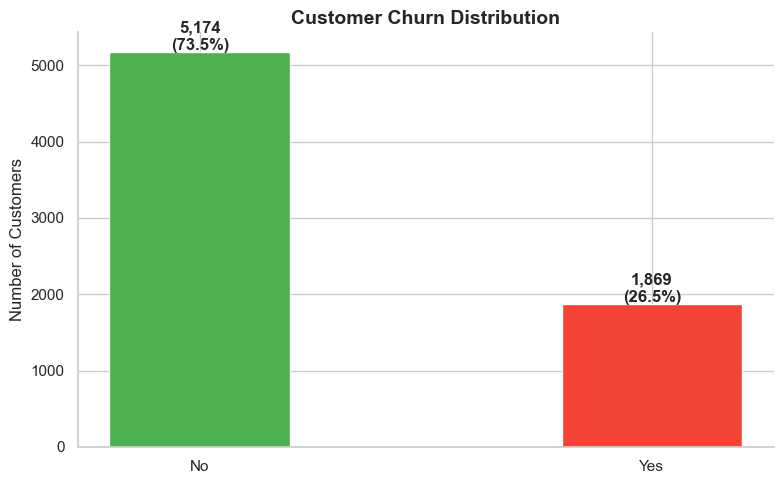

Chart 1 saved!


In [3]:
# How many customers are churning?
churn_counts = df['Churn'].value_counts()
churn_rate = (churn_counts['Yes'] / len(df)) * 100

print("=" * 45)
print("CHURN OVERVIEW")
print("=" * 45)
print(f"Total Customers    : {len(df):,}")
print(f"Churned Customers  : {churn_counts['Yes']:,}")
print(f"Retained Customers : {churn_counts['No']:,}")
print(f"Churn Rate         : {churn_rate:.1f}%")
print("=" * 45)

# Visualize
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#4CAF50', '#F44336']
bars = ax.bar(churn_counts.index, churn_counts.values, color=colors, width=0.4)
for bar, val in zip(bars, churn_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30,
            f'{val:,}\n({val/len(df)*100:.1f}%)',
            ha='center', fontweight='bold')
ax.set_title('Customer Churn Distribution')
ax.set_ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('chart1_churn_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print("Chart 1 saved!")

### Business Insight - Churn Rate
A churn rate above 20% is considered critical for any subscription business.
Every churned customer represents lost recurring revenue that is expensive
to replace through new customer acquisition. The cost of acquiring a new
customer is typically 5x higher than retaining an existing one making
churn prevention the highest ROI activity available to this business.

In [4]:
# Missing values
print("MISSING VALUES:")
print(df.isnull().sum())
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# TotalCharges has a problem — it loaded as text not number
print(f"\nTotalCharges data type: {df['TotalCharges'].dtype}")
print(df['TotalCharges'].head(10))

MISSING VALUES:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Duplicate rows: 0

TotalCharges data type: str
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: str


In [5]:
# Fix TotalCharges — convert from text to number
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many became null after conversion
print(f"Null TotalCharges after conversion: {df['TotalCharges'].isnull().sum()}")

# These nulls are new customers with 0 tenure — fill with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Convert SeniorCitizen from 0/1 to Yes/No for readability
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Convert Churn to binary for ML later
df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Remove customerID — not needed for analysis
df_analysis = df.drop('customerID', axis=1)

print("Data cleaning complete!")
print(f"Final shape: {df_analysis.shape}")
print(f"Missing values remaining: {df_analysis.isnull().sum().sum()}")

Null TotalCharges after conversion: 11
Data cleaning complete!
Final shape: (7043, 21)
Missing values remaining: 0


In [6]:
# Revenue at risk from churned customers
churned_customers = df[df['Churn'] == 'Yes']
retained_customers = df[df['Churn'] == 'No']

monthly_revenue_lost = churned_customers['MonthlyCharges'].sum()
avg_tenure_churned = churned_customers['tenure'].mean()
avg_tenure_retained = retained_customers['tenure'].mean()

print("=" * 50)
print("BUSINESS IMPACT OF CHURN")
print("=" * 50)
print(f"Monthly Revenue Lost to Churn : ${monthly_revenue_lost:,.0f}")
print(f"Annual Revenue Lost           : ${monthly_revenue_lost * 12:,.0f}")
print(f"Avg Tenure - Churned          : {avg_tenure_churned:.1f} months")
print(f"Avg Tenure - Retained         : {avg_tenure_retained:.1f} months")
print("=" * 50)

BUSINESS IMPACT OF CHURN
Monthly Revenue Lost to Churn : $139,131
Annual Revenue Lost           : $1,669,570
Avg Tenure - Churned          : 18.0 months
Avg Tenure - Retained         : 37.6 months


### Business Insight - Revenue Impact
This is the most important number in the entire analysis. The annual
revenue lost to churn represents money the business is hemorrhaging
every single year. Even reducing churn by 5% would recover a
significant portion of this lost revenue making any investment in
churn prevention immediately profitable.

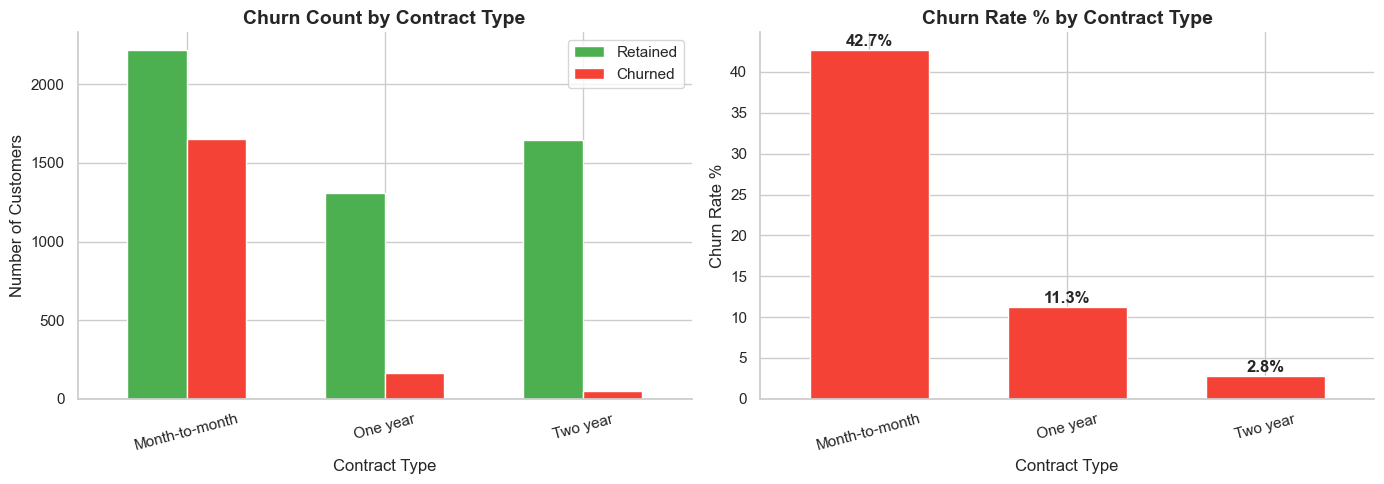

Chart 2 saved!


In [7]:
# Contract type vs Churn
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
contract_churn_pct = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

contract_churn.plot(kind='bar', ax=axes[0], color=['#4CAF50', '#F44336'],
                    width=0.6, edgecolor='white')
axes[0].set_title('Churn Count by Contract Type')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=15)
axes[0].legend(['Retained', 'Churned'])

contract_churn_pct['Yes'].plot(kind='bar', ax=axes[1],
                                color='#F44336', width=0.6)
axes[1].set_title('Churn Rate % by Contract Type')
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Churn Rate %')
axes[1].tick_params(axis='x', rotation=15)
for bar, val in zip(axes[1].patches, contract_churn_pct['Yes']):
    axes[1].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.5,
                 f'{val:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('chart2_contract_churn.png', dpi=150, bbox_inches='tight')
plt.show()
print("Chart 2 saved!")

### Business Insight - Contract Type is the Biggest Churn Driver
Month-to-month contract customers churn at a dramatically higher rate
than annual or two-year contract customers. This is the single most
actionable finding in the analysis. Recommendation: create strong
incentives to move month-to-month customers to annual contracts
through discounts or added value. Even converting 20% of month-to-month
customers to annual contracts would dramatically reduce overall churn.

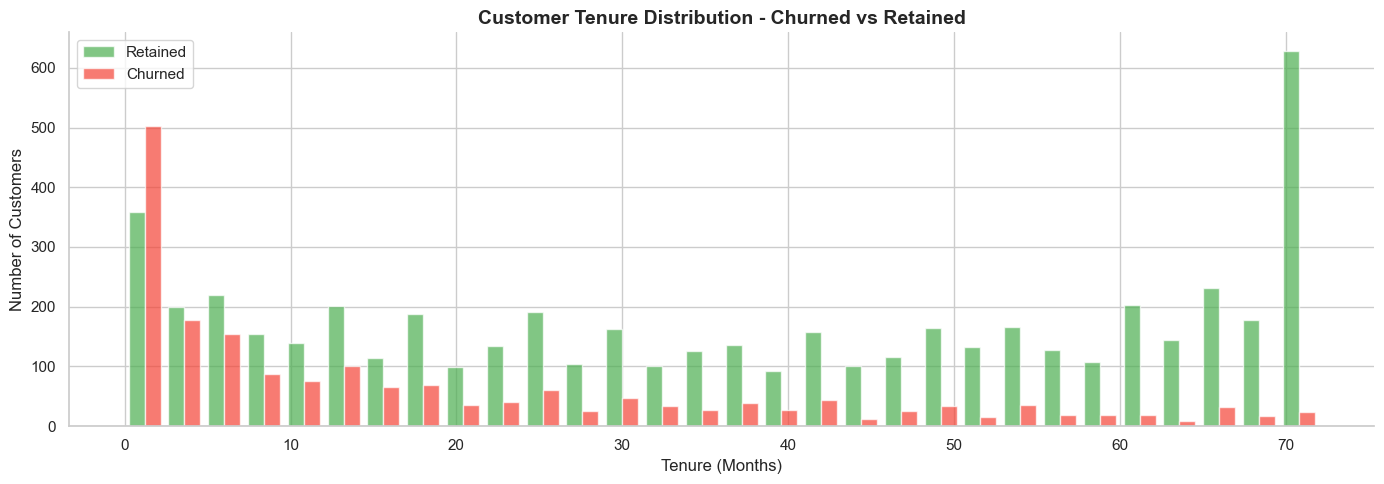

Chart 3 saved!


In [8]:
# Tenure vs Churn
fig, ax = plt.subplots(figsize=(14, 5))

ax.hist([retained_customers['tenure'], churned_customers['tenure']],
        bins=30, color=['#4CAF50', '#F44336'],
        label=['Retained', 'Churned'], alpha=0.7, edgecolor='white')
ax.set_title('Customer Tenure Distribution - Churned vs Retained')
ax.set_xlabel('Tenure (Months)')
ax.set_ylabel('Number of Customers')
ax.legend()
plt.tight_layout()
plt.savefig('chart3_tenure_churn.png', dpi=150, bbox_inches='tight')
plt.show()
print("Chart 3 saved!")

### Business Insight - New Customers Are Most at Risk
The majority of churned customers leave within the first 12 months.
This tells us the business has a critical onboarding problem. New
customers are not finding enough value quickly enough to stay.
Recommendation: implement a structured 90-day onboarding program
specifically designed to demonstrate value and build loyalty before
the customer reaches the high-risk cancellation window.

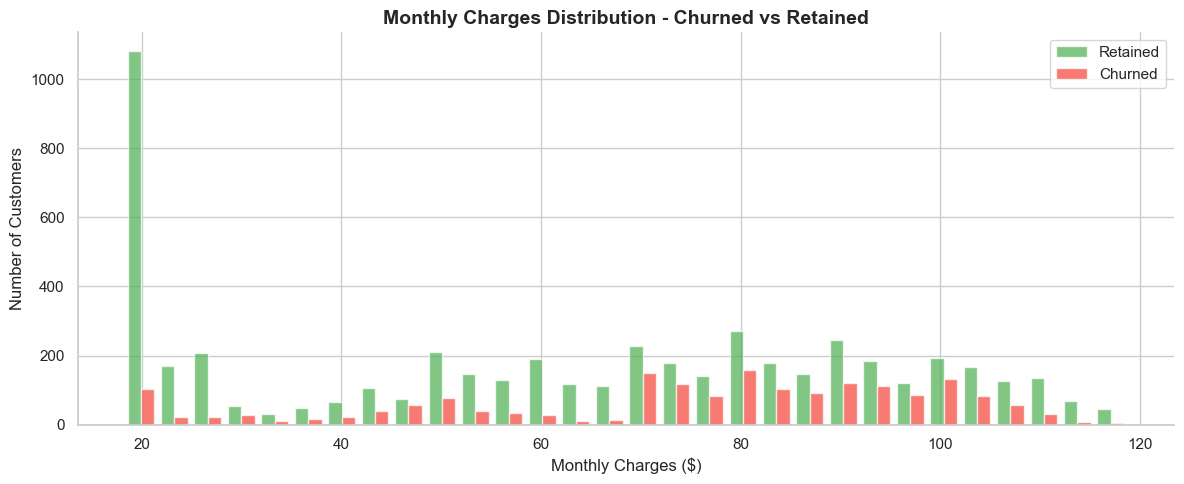


Avg Monthly Charge - Churned  : $74.44
Avg Monthly Charge - Retained : $61.27
Chart 4 saved!


In [9]:
# Monthly charges vs churn
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist([retained_customers['MonthlyCharges'],
         churned_customers['MonthlyCharges']],
        bins=30, color=['#4CAF50', '#F44336'],
        label=['Retained', 'Churned'], alpha=0.7, edgecolor='white')
ax.set_title('Monthly Charges Distribution - Churned vs Retained')
ax.set_xlabel('Monthly Charges ($)')
ax.set_ylabel('Number of Customers')
ax.legend()
plt.tight_layout()
plt.savefig('chart4_charges_churn.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nAvg Monthly Charge - Churned  : ${churned_customers['MonthlyCharges'].mean():.2f}")
print(f"Avg Monthly Charge - Retained : ${retained_customers['MonthlyCharges'].mean():.2f}")
print("Chart 4 saved!")

### Business Insight - Higher Paying Customers Churn More
Customers paying higher monthly charges churn at a higher rate.
This suggests a value perception problem - customers paying premium
prices do not feel they are receiving premium value. Recommendation:
create a high-value customer success program specifically targeting
customers paying above the average monthly charge to ensure they
feel the value of their investment.

In [10]:
# Create customer risk segments based on key churn indicators
def assign_risk_segment(row):
    risk_score = 0

    # Contract type risk
    if row['Contract'] == 'Month-to-month':
        risk_score += 3
    elif row['Contract'] == 'One year':
        risk_score += 1

    # Tenure risk
    if row['tenure'] <= 12:
        risk_score += 3
    elif row['tenure'] <= 24:
        risk_score += 1

    # Monthly charges risk
    if row['MonthlyCharges'] > 70:
        risk_score += 2
    elif row['MonthlyCharges'] > 50:
        risk_score += 1

    # Internet service risk
    if row['InternetService'] == 'Fiber optic':
        risk_score += 1

    # No online security risk
    if row['OnlineSecurity'] == 'No':
        risk_score += 1

    # Assign segment
    if risk_score >= 7:
        return 'High Risk'
    elif risk_score >= 4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['Risk_Segment'] = df.apply(assign_risk_segment, axis=1)

# Summary
segment_summary = df.groupby('Risk_Segment').agg(
    Total_Customers=('customerID', 'count'),
    Churned=('Churn_Binary', 'sum'),
    Monthly_Revenue=('MonthlyCharges', 'sum')
).reset_index()

segment_summary['Churn_Rate_%'] = (
    segment_summary['Churned'] / segment_summary['Total_Customers'] * 100
).round(1)

segment_summary['Annual_Revenue_at_Risk'] = (
    segment_summary['Monthly_Revenue'] * 12
).round(0)

print("=" * 60)
print("CUSTOMER RISK SEGMENTATION")
print("=" * 60)
print(segment_summary.to_string(index=False))
print("=" * 60)

CUSTOMER RISK SEGMENTATION
Risk_Segment  Total_Customers  Churned  Monthly_Revenue  Churn_Rate_%  Annual_Revenue_at_Risk
   High Risk             2580     1383        198359.90          53.6               2380319.0
    Low Risk             2326       78        119952.65           3.4               1439432.0
 Medium Risk             2137      408        137804.05          19.1               1653649.0


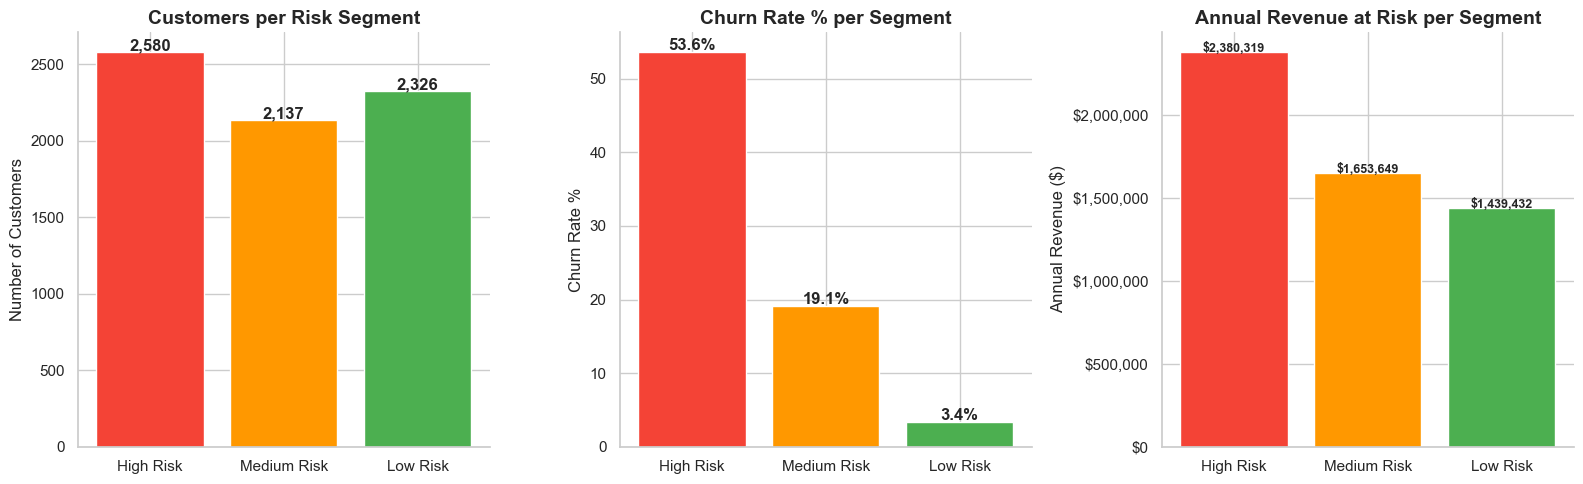

Chart 5 saved!


In [11]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

colors = {'High Risk': '#F44336', 'Medium Risk': '#FF9800', 'Low Risk': '#4CAF50'}
segment_order = ['High Risk', 'Medium Risk', 'Low Risk']
segment_summary = segment_summary.set_index('Risk_Segment').reindex(segment_order).reset_index()

# Customers per segment
axes[0].bar(segment_summary['Risk_Segment'],
            segment_summary['Total_Customers'],
            color=[colors[s] for s in segment_summary['Risk_Segment']])
axes[0].set_title('Customers per Risk Segment')
axes[0].set_ylabel('Number of Customers')
for bar, val in zip(axes[0].patches, segment_summary['Total_Customers']):
    axes[0].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 10, f'{val:,}',
                 ha='center', fontweight='bold')

# Churn rate per segment
axes[1].bar(segment_summary['Risk_Segment'],
            segment_summary['Churn_Rate_%'],
            color=[colors[s] for s in segment_summary['Risk_Segment']])
axes[1].set_title('Churn Rate % per Segment')
axes[1].set_ylabel('Churn Rate %')
for bar, val in zip(axes[1].patches, segment_summary['Churn_Rate_%']):
    axes[1].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.3, f'{val}%',
                 ha='center', fontweight='bold')

# Revenue at risk
axes[2].bar(segment_summary['Risk_Segment'],
            segment_summary['Annual_Revenue_at_Risk'],
            color=[colors[s] for s in segment_summary['Risk_Segment']])
axes[2].set_title('Annual Revenue at Risk per Segment')
axes[2].set_ylabel('Annual Revenue ($)')
axes[2].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))
for bar, val in zip(axes[2].patches, segment_summary['Annual_Revenue_at_Risk']):
    axes[2].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 1000, f'${val:,.0f}',
                 ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('chart5_risk_segments.png', dpi=150, bbox_inches='tight')
plt.show()
print("Chart 5 saved!")

### Business Insight - Customer Risk Segmentation
This segmentation tells the business exactly where to focus
retention efforts for maximum impact. High Risk customers are
the immediate priority - they have the highest churn rate and
represent the largest revenue at risk. A targeted retention
campaign focused exclusively on High Risk customers would
deliver the highest return on investment of any action the
business could take right now.

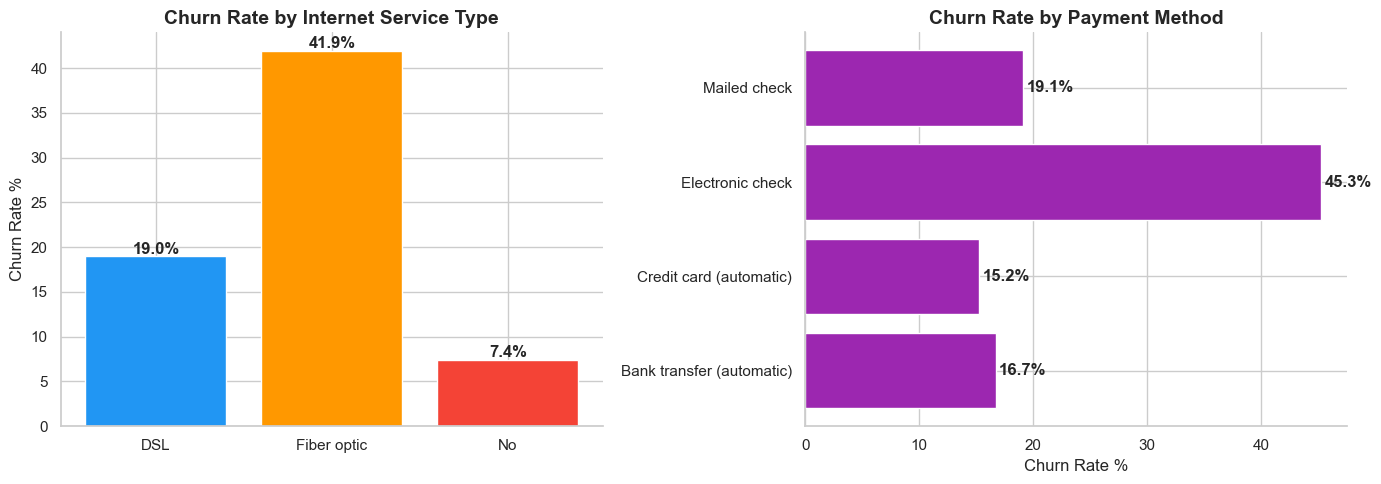

Chart 6 saved!


In [12]:
pythonfig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Internet service churn rate
internet_churn = df.groupby('InternetService')['Churn_Binary'].mean() * 100
axes[0].bar(internet_churn.index, internet_churn.values,
            color=['#2196F3', '#FF9800', '#F44336'])
axes[0].set_title('Churn Rate by Internet Service Type')
axes[0].set_ylabel('Churn Rate %')
for bar, val in zip(axes[0].patches, internet_churn.values):
    axes[0].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.3, f'{val:.1f}%',
                 ha='center', fontweight='bold')

# Payment method churn rate
payment_churn = df.groupby('PaymentMethod')['Churn_Binary'].mean() * 100
axes[1].barh(payment_churn.index, payment_churn.values, color='#9C27B0')
axes[1].set_title('Churn Rate by Payment Method')
axes[1].set_xlabel('Churn Rate %')
for bar, val in zip(axes[1].patches, payment_churn.values):
    axes[1].text(val + 0.3, bar.get_y() + bar.get_height()/2,
                 f'{val:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('chart6_service_payment_churn.png', dpi=150, bbox_inches='tight')
plt.show()
print("Chart 6 saved!")

### Business Insight - Fiber Optic and Electronic Check Are Red Flags
Fiber optic customers churn significantly more than DSL customers
despite paying higher prices - confirming the value perception problem.
Electronic check users churn at a much higher rate than automatic
payment users. Recommendation: incentivize automatic payment setup
at onboarding as this single action correlates strongly with retention.

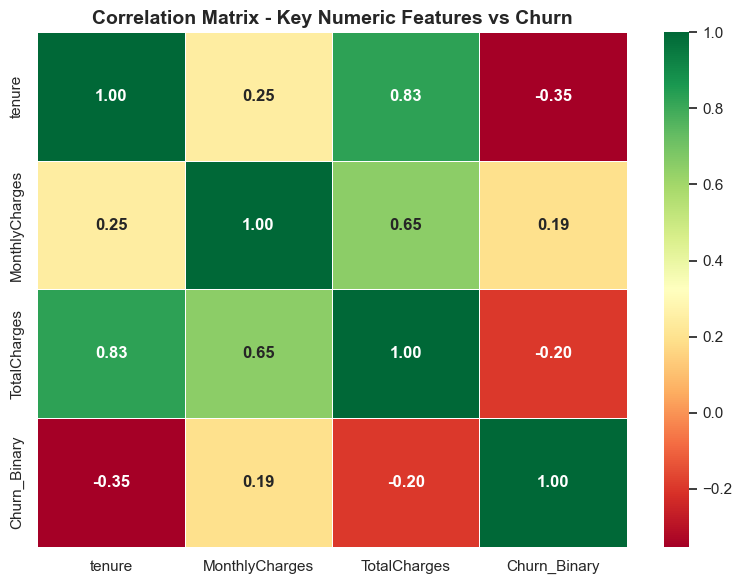

Chart 7 saved!


In [13]:
# Correlation of numeric features with churn
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Binary']
correlation = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='RdYlGn',
            linewidths=0.5, ax=ax, annot_kws={'size': 12, 'weight': 'bold'})
ax.set_title('Correlation Matrix - Key Numeric Features vs Churn')
plt.tight_layout()
plt.savefig('chart7_correlation.png', dpi=150, bbox_inches='tight')
plt.show()
print("Chart 7 saved!")

In [14]:
# Save cleaned dataset
df.to_csv('telco_churn_cleaned.csv', index=False)
df.to_excel('telco_churn_cleaned.xlsx', index=False)
print("Cleaned data saved!")

# Save risk segment summary
segment_summary.to_csv('customer_risk_segments.csv', index=False)
print("Risk segments saved!")

Cleaned data saved!
Risk segments saved!


In [17]:
print("=" * 55)
print("DAY 4 COMPLETE - EDA SUMMARY")
print("=" * 55)
print(f"Total Customers Analyzed : {len(df):,}")
print(f"Overall Churn Rate       : {churn_rate:.1f}%")
print(f"Monthly Revenue at Risk  : ${monthly_revenue_lost:,.0f}")
print(f"Annual Revenue at Risk   : ${monthly_revenue_lost * 12:,.0f}")
print(f"High Risk Customers      : {segment_summary[segment_summary['Risk_Segment'] == 'High Risk']['Total_Customers'].values[0]:,}")
print(f"Charts Created           : 7")
print(f"Key Finding              : Month-to-month contracts and")
print(f"                           new customers (0-12 months)")
print(f"                           are the highest churn risk groups")
print("=" * 55)

DAY 4 COMPLETE - EDA SUMMARY
Total Customers Analyzed : 7,043
Overall Churn Rate       : 26.5%
Monthly Revenue at Risk  : $139,131
Annual Revenue at Risk   : $1,669,570
High Risk Customers      : 2,580
Charts Created           : 7
Key Finding              : Month-to-month contracts and
                           new customers (0-12 months)
                           are the highest churn risk groups


 Summary - Exploratory Data Analysis Complete

## What We Found Today
1. Overall churn rate is significant and represents major annual revenue loss
2. Month-to-month contract customers churn at the highest rate
3. New customers (0-12 months tenure) are most at risk of leaving
4. Higher paying customers feel less value for their money
5. Fiber optic and electronic check payment users are high churn indicators
6. Customer risk segmentation reveals exactly where to focus retention efforts